In [18]:
#!pip install node
#!pip install npm
#!pip install sodapy
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import os
import datetime
import csv

from config import austin_key
from config import austin_app

In [2]:
#need to install extensions in vscode for instant markdown(by david bankier)
#allows you to open a readme inside vscode that looks how the formatting should when you load it to git hub 
#allows you to real time edit the readme and you can see how the readme formatting changes in git hub 
#concept of bullets in markdown is asterisk (will be formatted as bullets in the git file)
#*italic*
#**bold**
#***bold italic***
#--- will create a separating line across the file
#insert pictures with [caption](link to pic in file structure)  ex. ()
# number of ## in front of the text will change the size (more # means bigger font)
# tab indent below a bullet with another * will format a hollow sub bulllet
# using the `` around a phrase will format it as a code snippet (gray background and typewriter font)
# ||| will be a column separator to make tables from scratch
#|header 1|header 2
#------|-----
#|h1 data|h2 data
# : tells the table where to align the words (-----: rt align :----- left align)
#check out markdown cheat sheet on wikipedia

In [3]:
#not going to use the FBI data because it is submitted annually by the individual agencies so the data in the reports is compiled on an annual basis 
#we need data that is by day so we can see trends across the monthly 
#api_key=fbi_api_key
#state = "state"
#url = "https://api.usa.gov/crime/fbi/sapi/"
#query_url = f"https://api.usa.gov/crime/fbi/sapi/api/summarized/agencies/TX1010000/homicide/2017/2019?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv"
#query_url
#client = Socrata("data.austintexas.gov", None)
#results = client.get("fdj4-gpfu", limit=2000)
#results_df = pd.DataFrame.from_records(results)

#results_df.head()

app_token= austin_app

url = "https://data.austintexas.gov/resource/fdj4-gpfu.json?"
#crime_history = pd.DataFrame()
i=1
for i in range (1, 15):
    
    app_token= austin_app
    crime= "DEL CONTROLLED SUB/NARCOTIC"


    query_url = f"{url}$$app_token={app_token}&$limit=50000&$offset={50000*i}"
    response = requests.get(query_url).json()
    if i == 1:
        crime_history=pd.DataFrame(response)
        
    else:
        
        crime_history=crime_history.append(response)
crime_history.count()

incident_report_number         700000
crime_type                     700000
ucr_code                       700000
family_violence                700000
occ_date_time                  700000
occ_date                       700000
occ_time                       700000
rep_date_time                  700000
rep_date                       700000
rep_time                       700000
location_type                  696729
address                        700000
zip_code                       694767
council_district               692861
sector                         696460
district                       696308
pra                            695471
x_coordinate                   695764
y_coordinate                   695764
latitude                       686006
longitude                      686006
location                       686006
:@computed_region_a3it_2a2z    685987
:@computed_region_8spj_utxs    683907
:@computed_region_q9nd_rr82    684724
clearance_status               629488
clearance_da

In [4]:
#response = requests.get(query_url).json()
#response[1]['crime_type']
#print(json.dumps(response, indent=4))

#check how far back the dates go for the pagination 
crime_history['occ_date'].min()

'2014-04-15T00:00:00.000'

In [153]:
moon_df = pd.read_csv("moon-phase-calendar-landscape_copy.csv")
moon_df = pd.DataFrame(moon_df)
moon_df = moon_df.drop(columns=['Unnamed: 3', 'Unnamed: 4'])
moon_df.head()
#change to date time object and rename column
moon_df['Local Date']= pd.to_datetime(moon_df['Local Date'])

moon_df.head()

,Lunar Phase,Local Date,Local Time
0,New Moon,2014-01-01,5:15
1,First Quarter,2014-01-07,21:40
2,Full Moon,2014-01-15,22:53
3,Last Quarter,2014-01-23,23:21
4,New Moon,2014-01-30,15:40


In [154]:
moon_df.describe()

<ipython-input-154-feabe19b3a1b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  moon_df.describe()


,Lunar Phase,Local Date,Local Time
count,396,396,396
unique,4,396,345
top,Last Quarter,2016-03-01 00:00:00,7:27
freq,99,1,4
first,NaN,2014-01-01 00:00:00,NaN
last,NaN,2021-12-26 00:00:00,NaN


In [155]:
crime_df = pd.DataFrame(crime_history)
crime_df.head()
#if you want to group your data by time you have to do resample not .groupby(), can resample by days or by months, check time example pushed out last week
#compare if crime occurs more at night consistently vs increasing during full moon
#could sample by moon phase or day date 
#pick 10 full moon days and compare count to 10 non full moon days 

,incident_report_number,crime_type,ucr_code,family_violence,occ_date_time,occ_date,occ_time,rep_date_time,rep_date,rep_time,...,location,:@computed_region_a3it_2a2z,:@computed_region_8spj_utxs,:@computed_region_q9nd_rr82,clearance_status,clearance_date,ucr_category,category_description,:@computed_region_qwte_z96m,census_tract
0,20202411283,FAMILY DISTURBANCE,3400,N,2020-08-28T19:00:00.000,2020-08-28T00:00:00.000,1900,2020-08-28T19:47:00.000,2020-08-28T00:00:00.000,1947,...,"{'latitude': '30.15772825', 'longitude': '-97....",3637,5,1,NaN,NaN,NaN,NaN,NaN,NaN
1,20202411278,FAMILY DISTURBANCE,3400,N,2020-08-28T18:57:00.000,2020-08-28T00:00:00.000,1857,2020-08-28T18:57:00.000,2020-08-28T00:00:00.000,1857,...,"{'latitude': '30.24060511', 'longitude': '-97....",2859,3,3,NaN,NaN,NaN,NaN,NaN,NaN
2,20202411275,ASSAULT BY CONTACT FAM/DATING,902,Y,2020-08-28T18:55:00.000,2020-08-28T00:00:00.000,1855,2020-08-28T18:55:00.000,2020-08-28T00:00:00.000,1855,...,NaN,NaN,NaN,NaN,N,2020-09-02T00:00:00.000,NaN,NaN,NaN,NaN
3,20202411238,DISTURBANCE - OTHER,3401,N,2020-08-28T18:50:00.000,2020-08-28T00:00:00.000,1850,2020-08-28T18:50:00.000,2020-08-28T00:00:00.000,1850,...,NaN,NaN,NaN,NaN,N,2020-09-04T00:00:00.000,NaN,NaN,NaN,NaN
4,20205034127,BURGLARY OF VEHICLE,601,N,2020-08-28T18:47:00.000,2020-08-28T00:00:00.000,1847,2020-08-28T18:47:00.000,2020-08-28T00:00:00.000,1847,...,"{'latitude': '30.2864488', 'longitude': '-97.7...",2860,9,10,N,2020-08-30T00:00:00.000,23F,Theft,952,NaN


In [156]:
crime_clean_df = crime_df[["crime_type", "occ_date_time", "occ_date", "occ_time", "rep_date"]].copy()


In [157]:
#checking if occurence is actualy date/time
#crime_clean_df.dtypes
#convert to datetime object 
#pd.to_datetime(crime_clean_df['occ_date_time'])
#put back into dataframe overwrite column
crime_clean_df['occ_date_time']= pd.to_datetime(crime_clean_df['occ_date_time'])
crime_clean_df['occ_date']= pd.to_datetime(crime_clean_df['occ_date'])

crime_clean_df.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date
0,FAMILY DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000
1,FAMILY DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000
2,ASSAULT BY CONTACT FAM/DATING,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000
3,DISTURBANCE - OTHER,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000
4,BURGLARY OF VEHICLE,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000


In [158]:
#whatever one is typed first is the left df

crime_moon_df= crime_clean_df.merge(moon_df, left_on='occ_date', right_on='Local Date', how='left')
crime_moon_df.sample(50)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
238676,CRIMINAL MISCHIEF,2018-05-17 18:03:00,2018-05-17,1803,2018-05-17T00:00:00.000,NaN,NaT,NaN
460958,BURGLARY OF RESIDENCE,2016-04-27 14:30:00,2016-04-27,1430,2016-04-27T00:00:00.000,NaN,NaT,NaN
170909,FAMILY DISTURBANCE,2019-01-11 22:17:00,2019-01-11,2217,2019-01-11T00:00:00.000,NaN,NaT,NaN
347345,CRIMINAL MISCHIEF,2017-05-03 14:42:00,2017-05-03,1442,2017-05-03T00:00:00.000,NaN,NaT,NaN
577572,THEFT OF BICYCLE,2015-04-25 16:15:00,2015-04-25,1615,2015-04-25T00:00:00.000,First Quarter,2015-04-25,18:56
313450,ROBBERY BY ASSAULT,2017-08-20 11:22:00,2017-08-20,1122,2017-08-20T00:00:00.000,NaN,NaT,NaN
230773,ASSAULT BY CONTACT,2018-06-14 03:26:00,2018-06-14,326,2018-06-14T00:00:00.000,NaN,NaT,NaN
502130,WARRANT ARREST NON TRAFFIC,2015-12-17 10:56:00,2015-12-17,1056,2015-12-17T00:00:00.000,NaN,NaT,NaN
481497,BURGLARY NON RESIDENCE,2016-02-22 07:50:00,2016-02-22,750,2016-02-22T00:00:00.000,Full Moon,2016-02-22,12:20
230636,DISTURBANCE - OTHER,2018-06-14 18:05:00,2018-06-14,1805,2018-06-14T00:00:00.000,NaN,NaT,NaN


In [160]:
crime_moon_df['Lunar Phase'].value_counts()

Last Quarter     23942
First Quarter    23871
New Moon         23754
Full Moon        23222
Name: Lunar Phase, dtype: int64

In [161]:
crime_moon_df['Phase Value'] = crime_moon_df["Lunar Phase"]
crime_moon_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time,Phase Value
562647,BURGLARY OF VEHICLE,2015-06-09 22:00:00,2015-06-09,2200,2015-06-10T00:00:00.000,Last Quarter,2015-06-09,10:43,Last Quarter
85040,FAMILY DISTURBANCE,2019-10-30 00:57:00,2019-10-30,57,2019-10-30T00:00:00.000,NaN,NaT,NaN,NaN
603837,BURGLARY OF VEHICLE,2015-02-03 13:00:00,2015-02-03,1300,2015-02-05T00:00:00.000,Full Moon,2015-02-03,17:10,Full Moon
675559,THEFT OF BICYCLE,2014-06-27 00:00:00,2014-06-27,0,2014-06-27T00:00:00.000,New Moon,2014-06-27,3:10,New Moon
286667,FAMILY DISTURBANCE,2017-11-21 23:12:00,2017-11-21,2312,2017-11-21T00:00:00.000,NaN,NaT,NaN,NaN
629884,DISTURBANCE - OTHER,2014-11-09 21:23:00,2014-11-09,2123,2014-11-09T00:00:00.000,NaN,NaT,NaN,NaN
214016,BURGLARY OF VEHICLE,2018-08-12 06:07:00,2018-08-12,607,2018-08-12T00:00:00.000,NaN,NaT,NaN,NaN
535384,DOC FIGHTING,2015-08-31 19:49:00,2015-08-31,1949,2015-08-31T00:00:00.000,NaN,NaT,NaN,NaN
228383,PROTECTIVE ORDER,2018-06-22 16:25:00,2018-06-22,1625,2018-06-22T00:00:00.000,NaN,NaT,NaN,NaN
218479,THEFT,2018-07-27 17:00:00,2018-07-27,1700,2018-08-06T00:00:00.000,Full Moon,2018-07-27,15:22,Full Moon


In [162]:
crime_moon_df.loc[:, 'Phase Value']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
699995    Full Moon
699996    Full Moon
699997    Full Moon
699998    Full Moon
699999    Full Moon
Name: Phase Value, Length: 700000, dtype: object

In [163]:
#think of some crimes you think are more or less likely to be committed under a full moon/ at night etc
#adding databases together vertically will be concatenate; filter databases down to crime type and occurence date 
#pd.concat[]
#all_crimes = [response[i]['crime_type'] for i in range (len(response))]
#set(all_crimes)


#check all of the unique crime names
#crime_type = crime_clean_df.crime_type.unique()
#crime_type

In [136]:
#create pivot table of the crime duplicates and sort to find top 50 reported crimes 
duplicates = crime_clean_df.pivot_table(index = 'crime_type', aggfunc= 'size')
#data series can sort index or sort values, default to sort by index so we want to sort by the values instead
duplicates.sort_values(ascending= False).head(50)


crime_type
FAMILY DISTURBANCE                67773
BURGLARY OF VEHICLE               63740
THEFT                             62289
CRIMINAL MISCHIEF                 35115
ASSAULT W/INJURY-FAM/DATE VIOL    22461
DISTURBANCE - OTHER               21832
THEFT BY SHOPLIFTING              20994
DWI                               18987
HARASSMENT                        17185
BURGLARY OF RESIDENCE             16814
ASSAULT WITH INJURY               16310
AUTO THEFT                        15362
RUNAWAY CHILD                     12995
POSSESSION OF MARIJUANA           12791
PUBLIC INTOXICATION               12474
WARRANT ARREST NON TRAFFIC        11788
POSS CONTROLLED SUB/NARCOTIC      11784
ASSAULT BY CONTACT                11653
BURGLARY NON RESIDENCE            10776
CRIMINAL TRESPASS                  9593
FRAUD - OTHER                      9140
THEFT OF BICYCLE                   8656
IDENTITY THEFT                     7941
CUSTODY ARREST TRAFFIC WARR        7709
POSS OF DRUG PARAPHERNALIA   

In [137]:
#replace one crime type with the more generic types ex "bicycle theft" to "theft", grouping like crimes in the top 50
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
crime_grouped = crime_moon_df.replace({"THEFT BY SHOPLIFTING" : "THEFT", "AUTO THEFT" : "THEFT", "THEFT OF BICYCLE" : "THEFT", "THEFT OF SERVICE":"THEFT", "THEFT OF LICENSE PLATE": "THEFT",
                                       "THEFT FROM AUTO":"THEFT", "THEFT FROM PERSON":"THEFT", "THEFT FROM BUILDING":"THEFT", "THEFT OF TRAILER" :"THEFT",
                                       "DWI":"INTOXICATION CRIME", "PUBLIC INTOXICATION":"INTOXICATION CRIME", "DWI 2ND": "INTOXICATION CRIME", 
                                        "DWI  .15 BAC OR ABOVE": "INTOXICATION CRIME", "DRIVING WHILE INTOX / FELONY" : "INTOXICATION CRIME",
                                       "POSSESSION OF MARIJUANA": "DRUG RELATED", "POSS CONTROLLED SUB/NARCOTIC":"DRUG RELATED", "POSS OF DRUG PARAPHERNALIA":"DRUG RELATED",
                                       "ASSAULT WITH INJURY":"ASSAULT", "ASSAULT W/INJURY-FAM/DATE VIOL" : "ASSAULT", "ASSAULT BY CONTACT" :"ASSAULT", "ASSAULT BY THREAT": "ASSAULT",
                                       "ASSAULT BY CONTACT FAM/DATING": "ASSAULT", "AGG ASSAULT":"ASSAULT", "AGG ASLT STRANGLE/SUFFOCATE":"ASSAULT",
                                       "AGG ASSAULT FAM/DATE VIOLENCE": "ASSAULT", "FELONY ENHANCEMENT/ASSLT W/INJ" : "ASSAULT", "ASSAULT  CONTACT-SEXUAL NATURE" :"ASSAULT",
                                       "AGG ROBBERY/DEADLY WEAPON": "ROBBERY", "ROBBERY BY ASSAULT" :"ROBBERY",
                                       "BURGLARY OF VEHICLE":"BURGLARY", "BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT" : "BURGLARY", "BURGLARY OF RESIDENCE" : "BURGLARY", "BURGLARY NON RESIDENCE" :"BURGLARY",
                                       "FRAUD - OTHER" :"FRAUD", "IDENTITY THEFT":"FRAUD", "FORGERY AND PASSING":"FRAUD", "CRED CARD ABUSE - OTHER":"FRAUD", "DEBIT CARD ABUSE":"FRAUD",
                                       "FAMILY DISTURBANCE":"DISTURBANCE","DATING DISTURBANCE":"DISTURBANCE","FAMILY DISTURBANCE/PARENTAL":"DISTURBANCE","DISTURBANCE - OTHER":"DISTURBANCE"})



In [138]:
crime_grouped.head()

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Date,Moon Phase
0,DISTURBANCE,2020-08-28 19:00:00,2020-08-28,1900,2020-08-28T00:00:00.000,NaT,NaN
1,DISTURBANCE,2020-08-28 18:57:00,2020-08-28,1857,2020-08-28T00:00:00.000,NaT,NaN
2,ASSAULT,2020-08-28 18:55:00,2020-08-28,1855,2020-08-28T00:00:00.000,NaT,NaN
3,DISTURBANCE,2020-08-28 18:50:00,2020-08-28,1850,2020-08-28T00:00:00.000,NaT,NaN
4,BURGLARY,2020-08-28 18:47:00,2020-08-28,1847,2020-08-28T00:00:00.000,NaT,NaN


In [139]:
duplicate_groups = crime_grouped.pivot_table(index = 'crime_type', aggfunc= 'size')
duplicate_groups.sort_values(ascending= False).head(50)

#cut the small database at runaway child 

crime_type
THEFT                             124599
DISTURBANCE                       101170
BURGLARY                           93318
ASSAULT                            76263
INTOXICATION CRIME                 39901
CRIMINAL MISCHIEF                  35115
DRUG RELATED                       31911
FRAUD                              31587
HARASSMENT                         17185
RUNAWAY CHILD                      12995
WARRANT ARREST NON TRAFFIC         11788
CRIMINAL TRESPASS                   9593
CUSTODY ARREST TRAFFIC WARR         7709
CHILD CUSTODY INTERFERE             5611
ROBBERY                             5426
TERRORISTIC THREAT                  4649
SUSPICIOUS PERSON                   4470
VIOL CITY ORDINANCE - OTHER         3455
CRASH/FAIL STOP AND RENDER AID      3105
PROTECTIVE ORDER                    2468
GRAFFITI                            2403
VIOL OF PROTECTIVE ORDER            2068
FAILURE TO IDENTIFY                 1856
DAMAGE CITY PROP                    1843
RAPE 

In [140]:
#group by date to find number of reports per day
#nevermind don't do groupby you have to use resample bc it is a datetime object
#report_date = crime_moon_df.groupby(['occ_date'])
date_df= crime_moon_df.groupby(['occ_date']).count()
date_df.reset_index(inplace=True)
#line graph of date vs count 
date_df.head()

,occ_date,crime_type,occ_date_time,occ_time,rep_date,Date,Moon Phase
0,2014-04-15,14,14,14,14,0,0
1,2014-04-16,318,318,318,318,0,0
2,2014-04-17,332,332,332,332,0,0
3,2014-04-18,363,363,363,363,0,0
4,2014-04-19,308,308,308,308,0,0


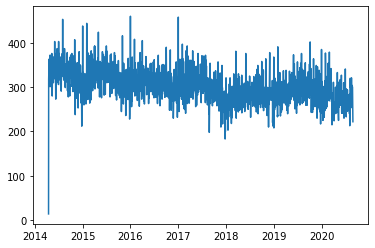

In [141]:
#break up dataframe by years and plot serparately so we can see by month 

#drop first row bc it's incomplete

plt.plot(date_df['occ_date'], date_df['crime_type'])

plt.show()

In [142]:
#crime_df = top_crime.loc[(top_crime['crime_type'] == 'THEFT') & (top_crime['crime_type'] == 'DISTURBANCE')]
fourteen_df = date_df.loc[(date_df['occ_date'] >= "2014-04-15") & (date_df['occ_date'] <= "2014-12-31")]
fourteen_df = fourteen_df.iloc[1:]
fourteen_df

In [168]:
fourteen_full_moon = moon_df.loc[(moon_df['Lunar Phase'] == 'Full Moon') & (moon_df['Local Date'] >= "2014-04-15") & (moon_df['Local Date'] <= "2014-12-31")]
fourteen_full_moon

,Lunar Phase,Local Date,Local Time
14,Full Moon,2014-04-15,2:45
18,Full Moon,2014-05-14,14:18
22,Full Moon,2014-06-12,23:13
26,Full Moon,2014-07-12,6:26
30,Full Moon,2014-08-10,13:10
34,Full Moon,2014-09-08,20:38
38,Full Moon,2014-10-08,5:50
42,Full Moon,2014-11-06,16:22
46,Full Moon,2014-12-06,6:27


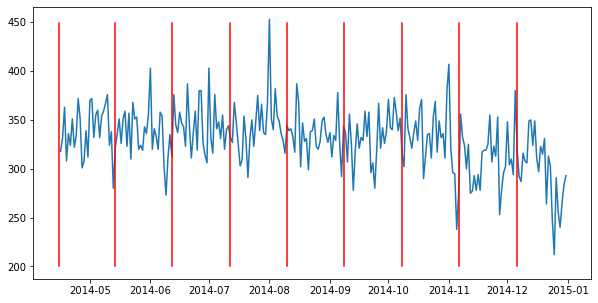

In [171]:
plt.figure(figsize= (10,5))
plt.plot(fourteen_df['occ_date'], fourteen_df['crime_type'])
#line where x value stays the same and y value changes 
#x for x in range 200 to 450
for i, row in fourteen_full_moon.iterrows():
    x= [row['Local Date'] for x in range (200, 450)]
    y= [x for x in range (200, 450)]
    
    plt.plot(x, y, color="red")

plt.show()

#do .count to find all the moon phases and use the replace function to replace the phases with numbers-
#either make the full moon number scaled with the crime data or do a second y axis  
#scale 400 to be full moon and 200 to be new moon


In [81]:
##report_date.head()
#report_date.sample(10)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [87]:
#create a df with only full moon phases 
full_moon_list = ['Full Moon']

full_moon_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(full_moon_list)]

full_moon_df.head(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
6988,DRUG RELATED,2020-08-03 23:50:00,2020-08-03,2350,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
6989,ASSAULT,2020-08-03 23:30:00,2020-08-03,2330,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
6990,ASSAULT,2020-08-03 23:11:00,2020-08-03,2311,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59
6991,BURGLARY,2020-08-03 23:10:00,2020-08-03,2310,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
6992,CRIMINAL MISCHIEF,2020-08-03 23:00:00,2020-08-03,2300,2020-08-06T00:00:00.000,Full Moon,2020-08-03,10:59
6993,ASSAULT,2020-08-03 22:49:00,2020-08-03,2249,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
6994,DISTURBANCE,2020-08-03 22:38:00,2020-08-03,2238,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
6995,ASSAULT,2020-08-03 22:37:00,2020-08-03,2237,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
6996,EVADING / VEHICLE PURSUIT,2020-08-03 22:34:00,2020-08-03,2234,2020-08-03T00:00:00.000,Full Moon,2020-08-03,10:59
6997,BURGLARY,2020-08-03 22:30:00,2020-08-03,2230,2020-08-04T00:00:00.000,Full Moon,2020-08-03,10:59


In [64]:
new_moon_list = ['New Moon']

new_moon_df = crime_grouped.loc[crime_grouped['Lunar Phase'].isin(new_moon_list)]

new_moon_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
103231,DISTURBANCE,2019-08-30 17:41:00,2019-08-30,1741,2019-08-30T00:00:00.000,New Moon,2019-08-30,5:38
695626,THEFT,2014-04-29 03:30:00,2014-04-29,330,2014-04-29T00:00:00.000,New Moon,2014-04-29,1:17
85634,ASSAULT,2019-10-27 21:58:00,2019-10-27,2158,2019-10-27T00:00:00.000,New Moon,2019-10-27,22:40
368013,CRIMINAL TRESPASS,2017-02-26 11:10:00,2017-02-26,1110,2017-02-26T00:00:00.000,New Moon,2017-02-26,9:00
675251,BURGLARY,2014-06-27 21:15:00,2014-06-27,2115,2014-06-27T00:00:00.000,New Moon,2014-06-27,3:10
197516,BURGLARY,2018-10-08 20:00:00,2018-10-08,2000,2018-10-09T00:00:00.000,New Moon,2018-10-08,22:47
255751,THEFT,2018-03-17 20:00:00,2018-03-17,2000,2018-03-20T00:00:00.000,New Moon,2018-03-17,8:14
608130,DISTURBANCE,2015-01-20 17:21:00,2015-01-20,1721,2015-01-20T00:00:00.000,New Moon,2015-01-20,7:14
18724,DISTURBANCE,2020-06-21 01:18:00,2020-06-21,118,2020-06-21T00:00:00.000,New Moon,2020-06-21,1:42
589505,THEFT,2015-03-20 12:00:00,2015-03-20,1200,2015-03-22T00:00:00.000,New Moon,2015-03-20,4:38


In [53]:
#create a list of only the crimes we want               
crime_list = ['THEFT', 'DISTURBANCE', 'BURGLARY', 'ASSAULT', 'INTOXICATION CRIME', 'CRIMINAL MISCHIEF', 'DRUG RELATED', 'FRAUD', 'HARASSMENT', 'RUNAWAY CHILD']

top_crime_df = crime_grouped.loc[crime_grouped['crime_type'].isin(crime_list)]

top_crime_df.sample(50)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
290754,BURGLARY,2017-11-07 03:00:00,2017-11-07,300,2017-11-07T00:00:00.000,NaN,NaT,NaN
250562,ASSAULT,2018-04-05 17:37:00,2018-04-05,1737,2018-04-05T00:00:00.000,NaN,NaT,NaN
46819,THEFT,2020-03-09 13:37:00,2020-03-09,1337,2020-03-09T00:00:00.000,Full Moon,2020-03-09,12:48
402030,THEFT,2016-11-04 10:16:00,2016-11-04,1016,2016-11-04T00:00:00.000,NaN,NaT,NaN
269177,CRIMINAL MISCHIEF,2018-01-28 00:00:00,2018-01-28,0,2018-01-28T00:00:00.000,NaN,NaT,NaN
55587,INTOXICATION CRIME,2020-02-08 21:46:00,2020-02-08,2146,2020-02-09T00:00:00.000,NaN,NaT,NaN
683851,THEFT,2014-06-02 12:08:00,2014-06-02,1208,2014-06-02T00:00:00.000,NaN,NaT,NaN
156760,THEFT,2019-03-03 12:30:00,2019-03-03,1230,2019-03-03T00:00:00.000,NaN,NaT,NaN
473720,DISTURBANCE,2016-03-17 23:39:00,2016-03-17,2339,2016-03-17T00:00:00.000,NaN,NaT,NaN
650137,THEFT,2014-09-09 20:45:00,2014-09-09,2045,2014-09-10T00:00:00.000,NaN,NaT,NaN


In [56]:
intox_list = ['INTOXICATION CRIME']

intox_crime_df = crime_grouped.loc[crime_grouped['crime_type'].isin(intox_list)]

intox_crime_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
520338,INTOXICATION CRIME,2015-10-18 00:46:00,2015-10-18,46,2015-10-18T00:00:00.000,NaN,NaT,NaN
88229,INTOXICATION CRIME,2019-10-18 18:01:00,2019-10-18,1801,2019-10-18T00:00:00.000,NaN,NaT,NaN
46347,INTOXICATION CRIME,2020-03-11 03:17:00,2020-03-11,317,2020-03-11T00:00:00.000,NaN,NaT,NaN
109169,INTOXICATION CRIME,2019-08-10 21:06:00,2019-08-10,2106,2019-08-10T00:00:00.000,NaN,NaT,NaN
150110,INTOXICATION CRIME,2019-03-26 00:13:00,2019-03-26,13,2019-03-26T00:00:00.000,NaN,NaT,NaN
541783,INTOXICATION CRIME,2015-08-12 02:56:00,2015-08-12,256,2015-08-12T00:00:00.000,NaN,NaT,NaN
684444,INTOXICATION CRIME,2014-05-31 21:40:00,2014-05-31,2140,2014-05-31T00:00:00.000,NaN,NaT,NaN
669532,INTOXICATION CRIME,2014-07-14 17:34:00,2014-07-14,1734,2014-07-14T00:00:00.000,NaN,NaT,NaN
526845,INTOXICATION CRIME,2015-09-27 04:11:00,2015-09-27,411,2015-09-27T00:00:00.000,Full Moon,2015-09-27,21:52
230253,INTOXICATION CRIME,2018-06-15 21:50:00,2018-06-15,2150,2018-06-16T00:00:00.000,NaN,NaT,NaN


In [57]:
assault_list = ['ASSAULT']

assault_df = crime_grouped.loc[crime_grouped['crime_type'].isin(assault_list)]

assault_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
279098,ASSAULT,2017-12-20 06:23:00,2017-12-20,623,2017-12-20T00:00:00.000,NaN,NaT,NaN
578255,ASSAULT,2015-04-23 16:14:00,2015-04-23,1614,2015-04-23T00:00:00.000,NaN,NaT,NaN
151483,ASSAULT,2019-03-21 09:05:00,2019-03-21,905,2019-03-21T00:00:00.000,NaN,NaT,NaN
17786,ASSAULT,2020-06-24 19:21:00,2020-06-24,1921,2020-06-24T00:00:00.000,NaN,NaT,NaN
291360,ASSAULT,2017-11-04 23:37:00,2017-11-04,2337,2017-11-04T00:00:00.000,Full Moon,2017-11-04,0:24
505635,ASSAULT,2015-12-06 03:16:00,2015-12-06,316,2015-12-06T00:00:00.000,NaN,NaT,NaN
613054,ASSAULT,2015-01-04 00:06:00,2015-01-04,6,2015-01-04T00:00:00.000,Full Moon,2015-01-04,22:54
487932,ASSAULT,2016-02-01 15:32:00,2016-02-01,1532,2016-02-01T00:00:00.000,NaN,NaT,NaN
177380,ASSAULT,2018-12-18 15:51:00,2018-12-18,1551,2018-12-18T00:00:00.000,NaN,NaT,NaN
450770,ASSAULT,2016-05-30 08:37:00,2016-05-30,837,2016-05-30T00:00:00.000,NaN,NaT,NaN


In [59]:
steal_list = ['THEFT', 'BURGLARY']

steal_df = crime_grouped.loc[crime_grouped['crime_type'].isin(steal_list)]

steal_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
695891,BURGLARY,2014-04-28 08:37:00,2014-04-28,837,2014-04-28T00:00:00.000,NaN,NaT,NaN
560431,BURGLARY,2015-06-16 14:28:00,2015-06-16,1428,2015-06-16T00:00:00.000,New Moon,2015-06-16,9:07
450634,BURGLARY,2016-05-30 17:28:00,2016-05-30,1728,2016-05-30T00:00:00.000,NaN,NaT,NaN
123176,THEFT,2019-06-25 16:57:00,2019-06-25,1657,2019-06-25T00:00:00.000,Last Quarter,2019-06-25,4:48
249745,THEFT,2018-04-08 10:54:00,2018-04-08,1054,2018-04-23T00:00:00.000,Last Quarter,2018-04-08,2:21
134659,THEFT,2019-05-18 14:48:00,2019-05-18,1448,2019-05-18T00:00:00.000,Full Moon,2019-05-18,16:11
519897,THEFT,2015-10-19 17:00:00,2015-10-19,1700,2015-10-19T00:00:00.000,NaN,NaT,NaN
539634,BURGLARY,2015-08-18 20:45:00,2015-08-18,2045,2015-08-19T00:00:00.000,NaN,NaT,NaN
469023,THEFT,2016-04-02 00:00:00,2016-04-02,0,2016-04-02T00:00:00.000,NaN,NaT,NaN
178454,THEFT,2018-12-14 20:40:00,2018-12-14,2040,2018-12-14T00:00:00.000,NaN,NaT,NaN


In [60]:
drug_list = ['DRUG RELATED']

drug_df = crime_grouped.loc[crime_grouped['crime_type'].isin(drug_list)]

drug_df.sample(10)

,crime_type,occ_date_time,occ_date,occ_time,rep_date,Lunar Phase,Local Date,Local Time
513592,DRUG RELATED,2015-11-09 12:03:00,2015-11-09,1203,2015-11-09T00:00:00.000,NaN,NaT,NaN
176573,DRUG RELATED,2018-12-21 12:53:00,2018-12-21,1253,2018-12-21T00:00:00.000,NaN,NaT,NaN
229321,DRUG RELATED,2018-06-19 02:03:00,2018-06-19,203,2018-06-19T00:00:00.000,NaN,NaT,NaN
541678,DRUG RELATED,2015-08-12 14:07:00,2015-08-12,1407,2015-08-12T00:00:00.000,NaN,NaT,NaN
496040,DRUG RELATED,2016-01-06 12:56:00,2016-01-06,1256,2016-01-06T00:00:00.000,NaN,NaT,NaN
534631,DRUG RELATED,2015-09-02 23:25:00,2015-09-02,2325,2015-09-02T00:00:00.000,NaN,NaT,NaN
318441,DRUG RELATED,2017-08-03 13:25:00,2017-08-03,1325,2017-08-03T00:00:00.000,NaN,NaT,NaN
301103,DRUG RELATED,2017-10-02 12:21:00,2017-10-02,1221,2017-10-02T00:00:00.000,NaN,NaT,NaN
26378,DRUG RELATED,2020-05-23 23:22:00,2020-05-23,2322,2020-05-23T00:00:00.000,NaN,NaT,NaN
634183,DRUG RELATED,2014-10-27 16:38:00,2014-10-27,1638,2014-10-27T00:00:00.000,NaN,NaT,NaN


In [35]:
#graphical representation of moon phase cycle and number of crime reports by day 

In [35]:
#whisker plot of moon phase and crime to check for outliers 
#compare violent crime and nonviolent crime trends to see if one or the other changes with moon phase
#specifically look at assault and intoxication crimes and theft
#also look at random more minor crimes to see if people acting stupid increases
#split out crimes for individual correlations to see if one in particular is driving trends 
#compare on annual and monthly basis 
#summary statistics
#major crimes vs total number of reports for a day 

In [35]:
#top_crime = crime_grouped.set_index('crime_type')
#needed to use | instead of & to represent OR 
#crime_df = top_crime.loc[(top_crime['crime_type'] == 'THEFT') & (top_crime['crime_type'] == 'DISTURBANCE')] 
             #& (top_crime['crime_type'] == "BURGLARY")]
             #& (top_crime['crime_type'] == "ASSAULT") &  (top_crime['crime_type'] == "INTOXICATION CRIME") &  (top_crime['crime_type'] == "CRIMINAL MISCHIEF")
            # &  (top_crime['crime_type'] == "DRUG RELATED") &  (top_crime['crime_type'] == "FRAUD") &  (top_crime['crime_type'] == "HARASSMENT") &
             #(top_crime['crime_type'] == "RUNAWAY CHILD")]

#indexCrimes = [~(crime_grouped['crime_type'] != 'THEFT') & (crime_grouped['crime_type'] != 'DISTURBANCE') & (crime_grouped['crime_type'] != "BURGLARY")]
             #& (top_crime['crime_type'] == "ASSAULT") &  (top_crime['crime_type'] == "INTOXICATION CRIME") &  (top_crime['crime_type'] == "CRIMINAL MISCHIEF")
              #&  (top_crime['crime_type'] == "DRUG RELATED") &  (top_crime['crime_type'] == "FRAUD") &  (top_crime['crime_type'] == "HARASSMENT") &
              # (top_crime['crime_type'] == "RUNAWAY CHILD")].index 
# Delete these row indexes from dataFrame

#df.drop(df.loc[df.time< df.time.shift()].index, inplace=True)
#crime_slim = crime_grouped.drop(indexCrimes)
#crime_slim.head()

In [ ]:
#df = df.drop(index=['Item_B','Item_D'])
#df.loc[[2,4,10,99],['Name','HP']]
#top_crime.loc[['DISTURBANCE', 'ASSAULT'], ['occ_date_time']]

#top_crime.head()

In [ ]:
#top_duplicates = crime_df.pivot_table(index = 'crime_type', aggfunc= 'size')
#top_duplicates.sort_values(ascending= False).head(50)